In [1]:
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
csv_path = r'C:/Users/Admin/Desktop/CASE STUDY 2023/Consolidated_QC_veg_flagged4MachineLearning.csv'

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df.head(15)

,TIME_IS,Plot_ID,Dataset_Path,Image_Name,overstory,understory
0,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8218.NEF,NaN,8.0
1,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8219.NEF,NaN,8.0
2,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8220.NEF,NaN,8.0
3,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8222.NEF,NaN,8.0
4,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8223.NEF,NaN,8.0
5,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8225.NEF,NaN,8.0
6,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8226.NEF,NaN,8.0
7,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8227.NEF,NaN,8.0
8,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8228.NEF,NaN,8.0
9,20160824T000000Z,BART_002,/D01/2016/BART00/BART_002/,D01_8231.NEF,NaN,8.0


In [5]:
df.shape

(7932, 6)

In [17]:
print(df.iloc[2])

TIME_IS                   20160824T000000Z
Plot_ID                           BART_002
Dataset_Path    /D01/2016/BART00/BART_002/
Image_Name                    D01_8220.NEF
overstory                              NaN
understory                             8.0
Name: 2, dtype: object


In [38]:
base_path = 'C:/Users/Admin/Desktop'

# Loop through each row in the dataframe and construct the image path
# Extract the necessary columns from the 3rd row of the dataframe
dataset_path = df.loc[2, 'Dataset_Path']
image_name = str(df.loc[2, 'Image_Name'])
overstory = 'overstory'
understory = 'understory'

# Construct the image path based on the overstory and understory columns
img_path = os.path.join(dataset_path, understory, image_name)

# Load the image using OpenCV (or any other image processing library)
final_path = base_path + img_path

print(final_path)

img = cv2.imread(final_path)

C:/Users/Admin/Desktop/D01/2016/BART00/BART_002/understory\D01_8220.NEF


In [39]:
cv2.imshow('Image', img)
cv2.waitKey(0)

-1

In [41]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur filter
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Extract features using a SIFT detector
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(blur, None)

# Print the number of keypoints and descriptors
print('Number of keypoints: ', len(kp))
print('Number of descriptors: ', des.shape[0])

Number of keypoints:  56
Number of descriptors:  56


In [42]:
# Draw the keypoints on the input image
image_kp = cv2.drawKeypoints(img, kp, None)

# Display the input image with keypoints
cv2.imshow('Image with Keypoints', image_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

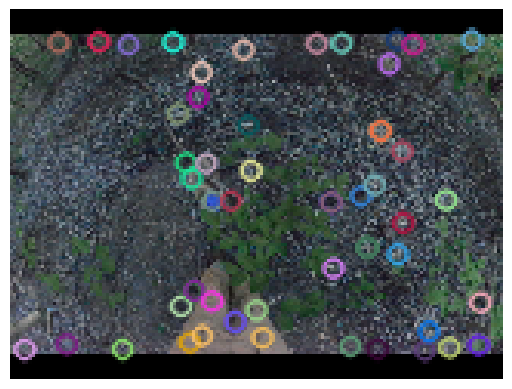

In [43]:
import matplotlib.pyplot as plt

plt.imshow(image_kp)
plt.axis('off')
plt.show()
